# Tasks to do:
Load the data in a pandas DataFrame

Have a look at the 1st five rows

Check if the dataset contains any null values

Check the shape of the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('iris1.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,NaN,1.4,0.2,Iris-Setosa


In [3]:
df.isnull().sum()

sepal length (cm)     0
sepal width (cm)     30
petal length (cm)    68
petal width (cm)      0
Class                 0
dtype: int64

In [4]:
df.shape

(150, 5)

# Tasks to do:
Handle null values

If a column has more than 40% null values, drop that column

Else fill the null values with mean of that column

In [5]:
for column in list(df.columns):
    if df[column].isnull().sum()>(0.40*150):
        df.drop(columns=column,axis=1,inplace=True)
    elif df[column].isnull().sum():
        df[column].replace(np.nan,df[column].mean(),inplace=True)
    else:
        continue
        

In [6]:
list(df.columns)

['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)', 'Class']

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5000,0.2,Iris-Setosa
1,4.9,3.0000,0.2,Iris-Setosa
2,4.7,3.2000,0.2,Iris-Setosa
3,4.6,3.1000,0.2,Iris-Setosa
4,5.0,3.0575,0.2,Iris-Setosa


# Tasks to do:
Convert the categorical features to numerical values using Label Encoder from sklearn

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
print(df.head())
print(df['Class'].unique())

   sepal length (cm)  sepal width (cm)  petal width (cm)  Class
0                5.1            3.5000               0.2      0
1                4.9            3.0000               0.2      0
2                4.7            3.2000               0.2      0
3                4.6            3.1000               0.2      0
4                5.0            3.0575               0.2      0
[0 1 2]


# Tasks to do:
Check for outlier in all the columns using boxplot.

If there are outliers, clip them, lower limit will be Q1-1.5 IQR and upper limit will be

Q3+1.5 IQR.

Q1 = 1st Quartile (25%)

Q3 = 3rd Quartile (75%)

IQR = Inter-quartile range (Q3-Q1)

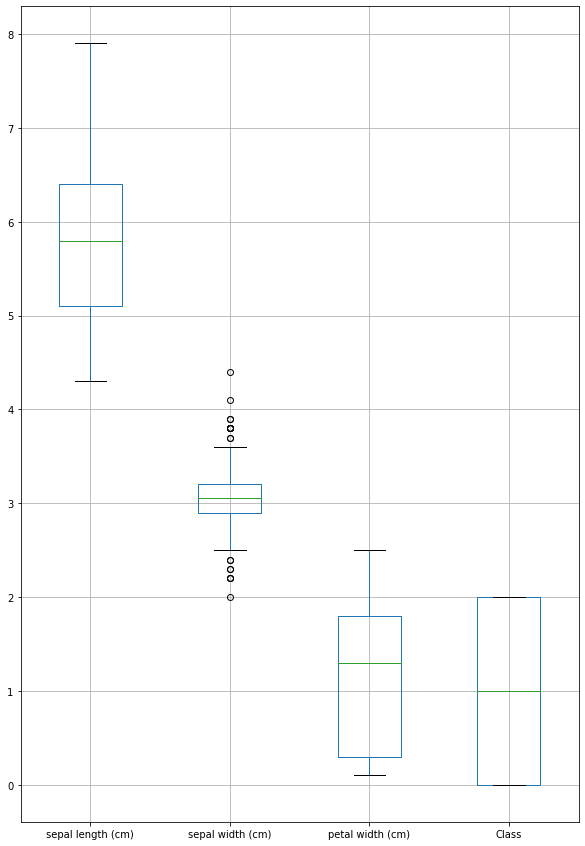

In [9]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,15))
plt.show()

Sepal width contains outliers, so we will need to cap them.

In [9]:
q1 = df['sepal width (cm)'].quantile(.25)
q3 = df['sepal width (cm)'].quantile(.75)
IQR = q3 - q1
df['sepal width (cm)'] = np.clip(df['sepal width (cm)'], q1 - 1.5 *IQR, q3 + 1.5 * IQR)

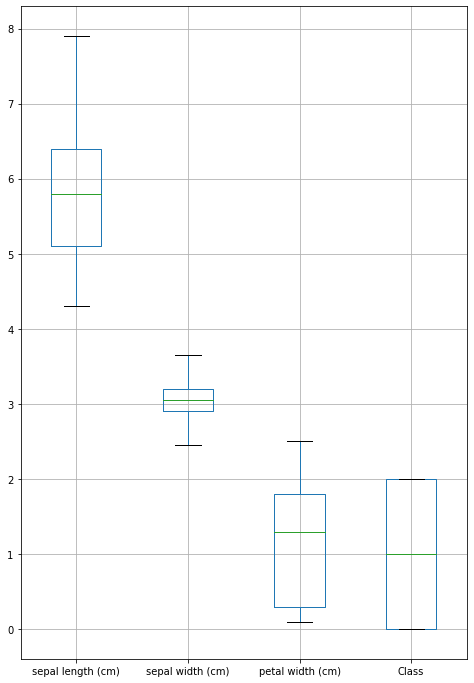

In [10]:
df.boxplot(figsize=(8,12))
plt.show()

Now we can see there are no outliers left

# Plot the correlation and tell which feature will help the most during prediction
Calculate correlation

Plot the correlation

Compare the correlation

<AxesSubplot:>

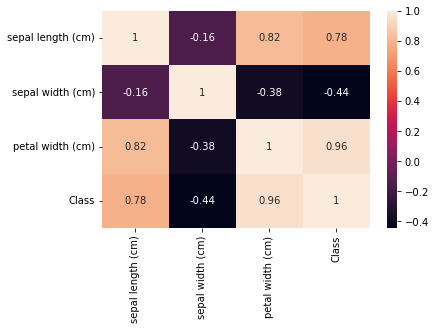

In [11]:
import seaborn as sns
correlation = df.corr()
sns.heatmap(correlation, annot = True)

Petal and sepal width are highly correlated with feature Class

# Tasks to do:
Split the dataset using sklearn, with 20% for testing with random_state=7

In [12]:
from sklearn.model_selection import train_test_split
X= df.iloc[:,:-1]
y= df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,
random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)
(120,)
(30,)


# Tasks to do:
Perform K-fold with K=10 with random_state = 7

Perform K-Fold with commonly used classification algorithm

Calculate the mean score of each iteration

In [13]:
 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,KFold
#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [14]:

models=[]
models.append(('lr:',LogisticRegression()))
models.append(('decision tree:',DecisionTreeClassifier()))
models.append(('svm:',SVC(gamma='auto')))
models.append(('knn:',KNeighborsClassifier()))
models.append(('naive bayes:',GaussianNB()))
models.append(('Random Forest:',RandomForestClassifier()))


In [15]:
models

[('lr:', LogisticRegression()),
 ('decision tree:', DecisionTreeClassifier()),
 ('svm:', SVC(gamma='auto')),
 ('knn:', KNeighborsClassifier()),
 ('naive bayes:', GaussianNB()),
 ('Random Forest:', RandomForestClassifier())]

In [16]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7,shuffle=True)
    cross_val_sc=cross_val_score(model,X,y,scoring='accuracy',cv=kfold)
    print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))

lr: : acc: 0.9533333333333334(standard deviation: 0.06699917080747259)
decision tree: : acc: 0.9333333333333333(standard deviation: 0.06666666666666665)
svm: : acc: 0.9666666666666666(standard deviation: 0.04472135954999579)
knn: : acc: 0.9533333333333334(standard deviation: 0.04268749491621898)
naive bayes: : acc: 0.9466666666666667(standard deviation: 0.08326663997864532)
Random Forest: : acc: 0.9400000000000001(standard deviation: 0.06960204339273698)


# Tasks to do:
Train a logistic regression model for prediction

Also, predict the classes for test data

In [17]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Evaluate the model
Print confusion matrix of the test data

Also, Þnd the precision and recall using classiÞcation report

Precision is the fraction of relevant instances among the retrieved instances

While recall (also known as sensitivity) is the fraction of the total amount of relevant
instances that were actually retrieved

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7 0 0]
 [0 9 3]
 [0 2 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.82      0.75      0.78        12
           2       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.84      0.83      0.83        30

